In [18]:
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('G:\AS699\INDIA\\diabetes.csv')

In [3]:
df.head().style.background_gradient(cmap='Blues')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1


In [4]:
df.describe().T.style.background_gradient(cmap='hot')

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000000,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,768.000000,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,768.000000,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,768.000000,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,768.000000,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,768.000000,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,768.000000,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,768.000000,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.000000,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

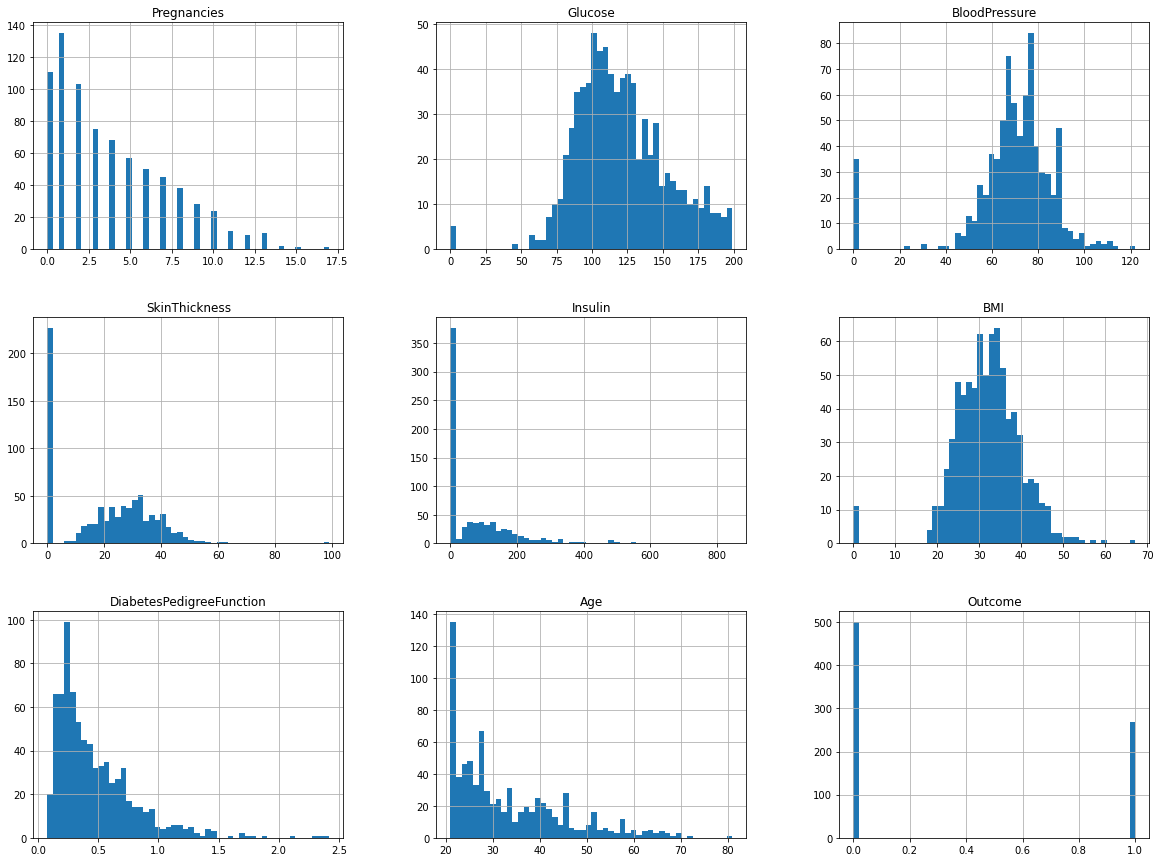

In [8]:
df.hist(bins=50,figsize=(20,15))
plt.show()

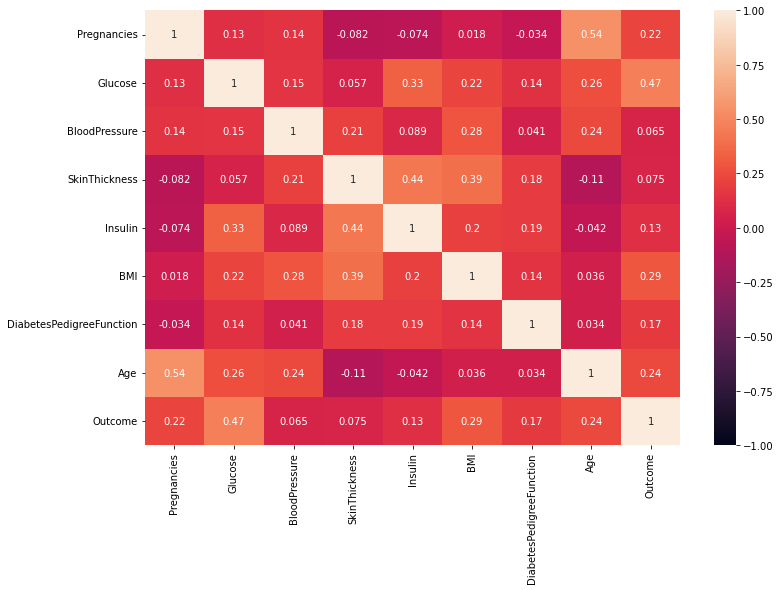

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

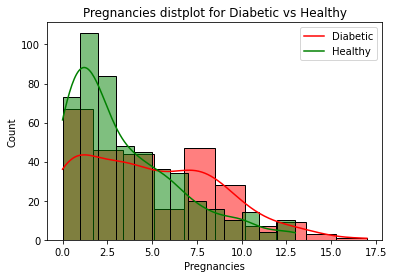

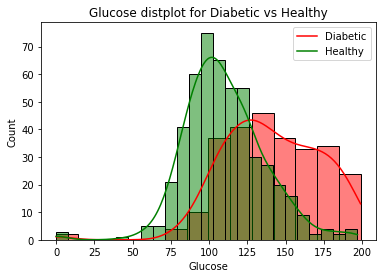

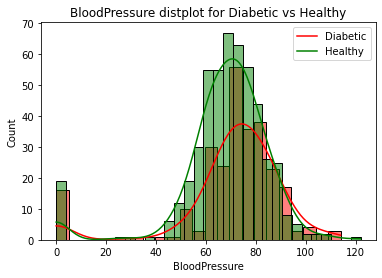

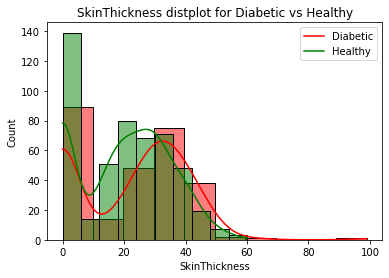

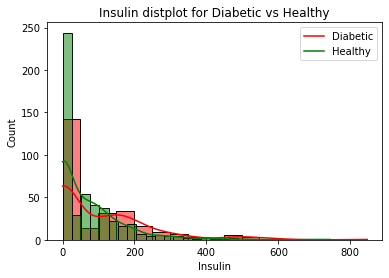

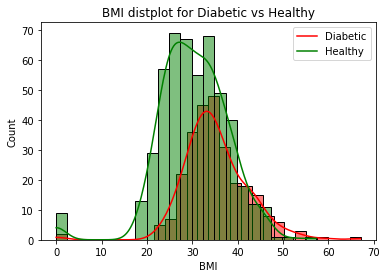

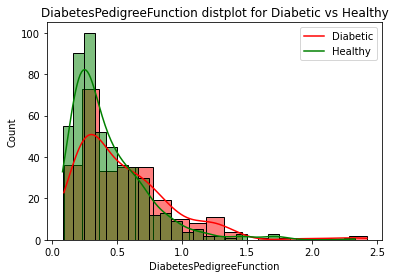

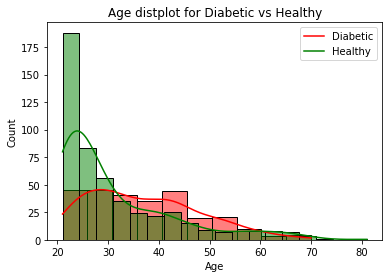

In [10]:
import seaborn as sns
def compare_dist_by_target(features):
    for feature in features:
        diabetic = df.loc[df['Outcome'] == 1][feature]
        healthy = df.loc[df['Outcome'] == 0][feature]

        sns.histplot(diabetic, color='red', kde=True)
        sns.histplot(healthy, color='green', kde=True)
        plt.title(f'{feature} distplot for Diabetic vs Healthy')
        plt.legend(['Diabetic', 'Healthy'])
        plt.show()
    
features = df.columns.to_list()
features.remove('Outcome')
compare_dist_by_target(features)

In [11]:
# find meadian based on target class
tmp=df.copy()
for feature in features:
    tmp[feature]=tmp[feature].replace(0,np.nan)
    print(pd.DataFrame(tmp.groupby('Outcome')[feature].median()))

         Pregnancies
Outcome             
0                3.0
1                5.0
         Glucose
Outcome         
0          107.0
1          140.0
         BloodPressure
Outcome               
0                 70.0
1                 74.5
         SkinThickness
Outcome               
0                 27.0
1                 32.0
         Insulin
Outcome         
0          102.5
1          169.5
          BMI
Outcome      
0        30.1
1        34.3
         DiabetesPedigreeFunction
Outcome                          
0                           0.336
1                           0.449
          Age
Outcome      
0        27.0
1        36.0


In [12]:
# Replace missing values

# Impute missing values in Glucose feature
feat = 'Glucose'
df[feat] = df[feat].replace(0, np.nan)
df.loc[(df['Outcome'] == 0) & df[feat].isnull(), feat] = 107.0
df.loc[(df['Outcome'] == 1) & df[feat].isnull(), feat] = 140.0

# Impute missing values in BloodPressure feature
feat = 'BloodPressure'
df[feat] = df[feat].replace(0, np.nan)
df.loc[(df['Outcome'] == 0) & df[feat].isnull(), feat] = 70.0
df.loc[(df['Outcome'] == 1) & df[feat].isnull(), feat] = 74.0

# Impute missing values in SkinThickness feature
feat = 'SkinThickness'
df[feat] = df[feat].replace(0, np.nan)
df.loc[(df['Outcome'] == 0) & df[feat].isnull(), feat] = 27.0
df.loc[(df['Outcome'] == 1) & df[feat].isnull(), feat] = 32.0

# Impute missing values in Insulin feature
feat = 'Insulin'
df[feat] = df[feat].replace(0, np.nan)
df.loc[(df['Outcome'] == 0) & df[feat].isnull(), feat] = 102.5
df.loc[(df['Outcome'] == 1) & df[feat].isnull(), feat] = 169.5

# Impute missing values in BMI feature
feat = 'BMI'
df[feat] = df[feat].replace(0, np.nan)
df.loc[(df['Outcome'] == 0) & df[feat].isnull(), feat] = 30.1
df.loc[(df['Outcome'] == 1) & df[feat].isnull(), feat] = 34.3

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


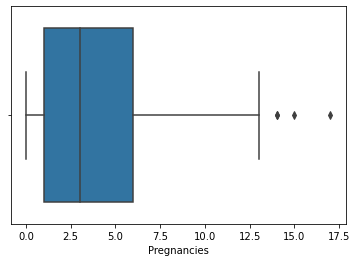

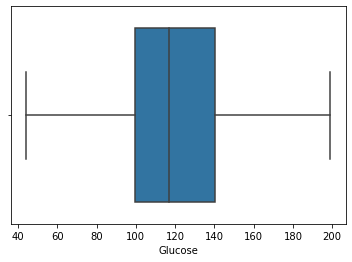

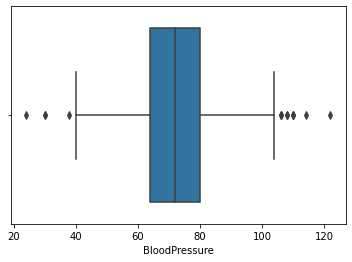

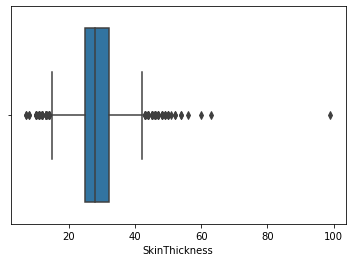

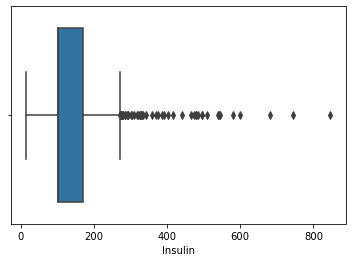

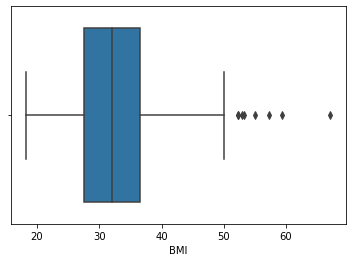

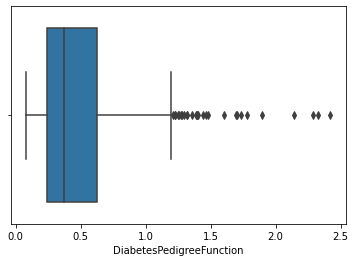

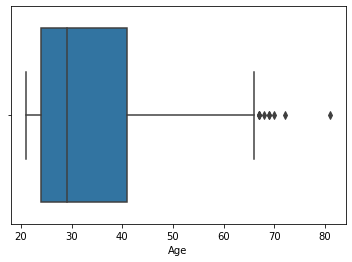

In [13]:
for feature in features:
    sns.boxplot(x=df[feature])
    plt.show()

In [14]:
# Cap outliers by 75th & 25th quantiles
def get_upper_lower_bound(feature):
    lq = df[feature].quantile(0.25)
    uq = df[feature].quantile(0.75)
    iqr = uq - lq
    return (lq - (1.5 * iqr)), (uq + (1.5 * iqr))

for feature in features:
    lb, ub = get_upper_lower_bound(feature)
    print(f'{feature} : {lb}, {ub}')
    df.loc[(df[feature] <= lb), feature] = lb
    df.loc[(df[feature] >= ub), feature] = ub

Pregnancies : -6.5, 13.5
Glucose : 39.0, 201.0
BloodPressure : 40.0, 104.0
SkinThickness : 14.5, 42.5
Insulin : 2.0, 270.0
BMI : 13.849999999999998, 50.25
DiabetesPedigreeFunction : -0.32999999999999996, 1.2
Age : -1.5, 66.5


In [19]:
## Describe features grouped by Outcome

def describe_feats_grouped_by_outcome(feature):
    
    t_stat, pval = get_ttest_results(feature)
    if round(pval, 2) <= 0.025:
        print(f'{feature} analysis: ')
        print(df.groupby('Outcome')[feature].describe())
        print(f'T-Statistic: {t_stat}, P-val: {pval:.2f}')
    else:
        print(f'{feature} is not statistically significant to predict the Outcome')
    print('=======================================')
    
def get_ttest_results(feature):    
    group_1 = df[df['Outcome'] == 0][feature]
    group_2 = df[df['Outcome'] == 1][feature]
    t_stat, pval = stats.ttest_ind(group_1, group_2, equal_var=False)
    return t_stat, pval
    
    
for feat in list(df.drop('Outcome', axis=1).columns):
    describe_feats_grouped_by_outcome(feat)
    


Pregnancies analysis: 
         count      mean       std  min   25%  50%  75%   max
Outcome                                                      
0        500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0
1        268.0  4.843284  3.681321  0.0  1.75  4.0  8.0  13.5
T-Statistic: -5.892432922934636, P-val: 0.00
Glucose analysis: 
         count        mean        std   min    25%    50%    75%    max
Outcome                                                                
0        500.0  110.622000  24.703920  44.0   93.0  107.0  125.0  197.0
1        268.0  142.302239  29.488811  78.0  119.0  140.0  167.0  199.0
T-Statistic: -14.992112521284481, P-val: 0.00
BloodPressure analysis: 
         count       mean        std   min   25%   50%   75%    max
Outcome                                                            
0        500.0  70.836000  11.536346  40.0  63.5  70.0  78.0  104.0
1        268.0  75.175373  11.513021  40.0  68.0  74.0  82.0  104.0
T-Statistic: -4.975106216344139, P

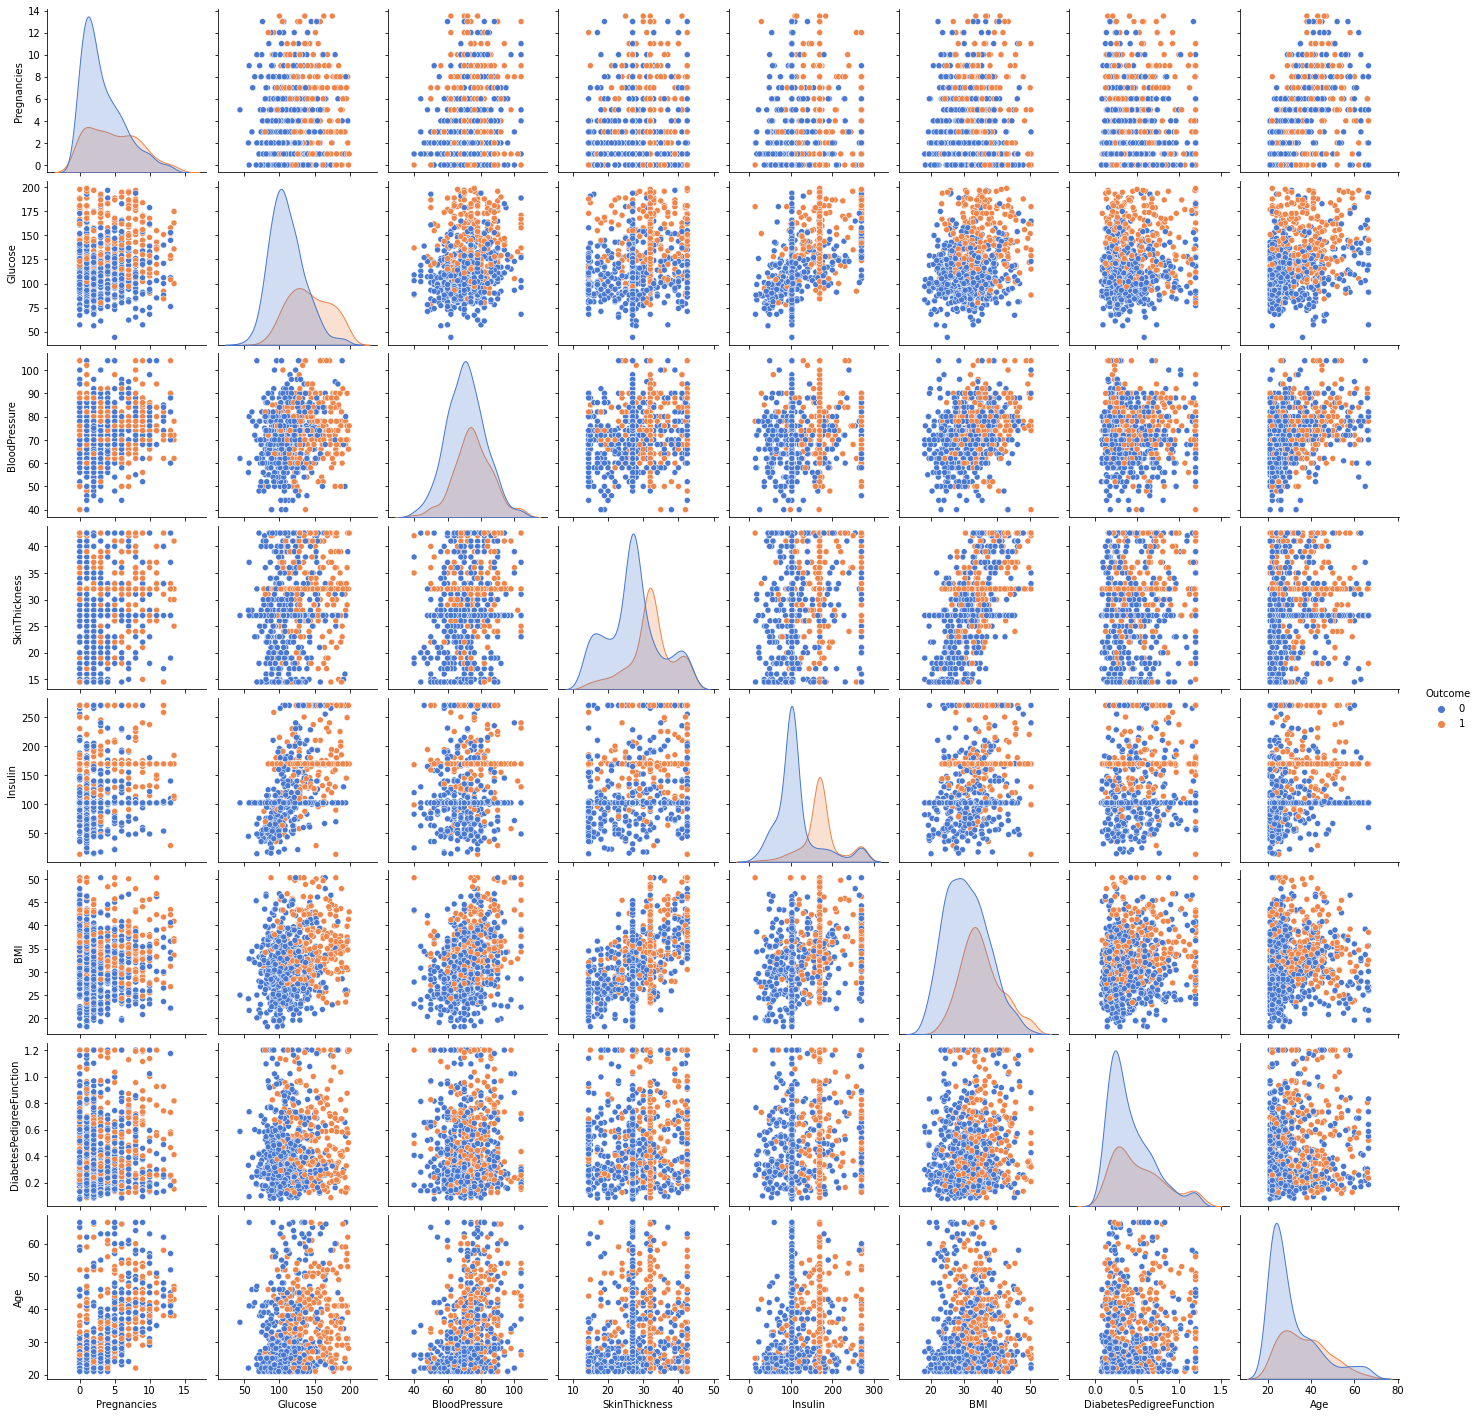

In [20]:
sns.pairplot(df,hue="Outcome",palette='muted')

# create test set 

In [21]:
x=df.drop('Outcome',axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,42.5,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,102.5,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,32.0,169.5,30.1,0.349,47.0


In [22]:
y=df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state=42)

In [24]:
# x_train=x.iloc[:600]
# x_test=x.iloc[600:]
# y_train=y[:600]
# y_test=y[600:]
# print("x_train Shape: ",x_train.shape)
# print("x_test Shape: ",x_test.shape)
# print("y_train Shape: ",y_train.shape)
# print("y_test Shape: ",y_test.shape)

# models

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score,roc_curve,classification_report,mean_squared_error,f1_score,recall_score,precision_score
from sklearn.metrics import confusion_matrix, PrecisionRecallDisplay, RocCurveDisplay, precision_recall_curve, roc_curve

# RandomForestClassifier

In [34]:
forest_clf=RandomForestClassifier(n_estimators=100,random_state=42)
forest_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

 Measuring Accuracy Using Cross-val_score

In [35]:
from sklearn .model_selection import cross_val_score
cross_val_score(forest_clf,x_train,y_train,cv=5)

array([0.86178862, 0.91869919, 0.84552846, 0.90243902, 0.89344262])

In [36]:
forest_score=cross_val_score(forest_clf,x_train,y_train,cv=5,scoring='accuracy')
forest_score.mean()

0.8843795815007329

confusion matrix

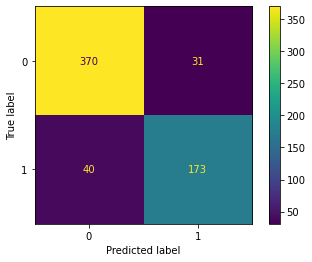

In [37]:
from sklearn.model_selection import cross_val_predict
y_train_predict=cross_val_predict(forest_clf,x_train,y_train,cv=5)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_train,y_train_predict)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [38]:
precision_score(y_train,y_train_predict)

0.8480392156862745

In [39]:
recall_score(y_train,y_train_predict)

0.812206572769953

In [40]:
f1_score(y_train,y_train_predict)

0.829736211031175

 Precision/Recall Tradeoff

In [41]:
y_scores = cross_val_predict(forest_clf, x_train, y_train, cv=3)

In [42]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)


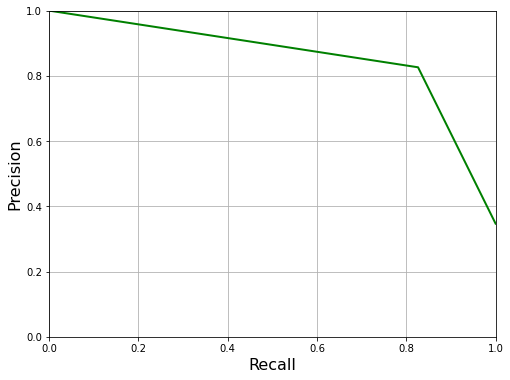

In [48]:
def plot_precision_vs_recall(precisions, recalls):
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.plot(recalls, precisions, "g-", linewidth=2)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [44]:
y_pred_proba = forest_clf.predict_proba(x_train)[:,1]
precision, recall, thresholds = precision_recall_curve(y_train,y_pred_proba)
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.600000, F-Score=1.000


In [45]:
y_train_pred_ = (y_scores >= 0.590000)

In [46]:
precision_score(y_train, y_train_pred_)

0.8262910798122066

In [47]:
recall_score(y_train, y_train_pred_)

0.8262910798122066

roc curve

In [49]:
fpr_forest, tpr_forest, thresholds = roc_curve(y_train, y_scores)

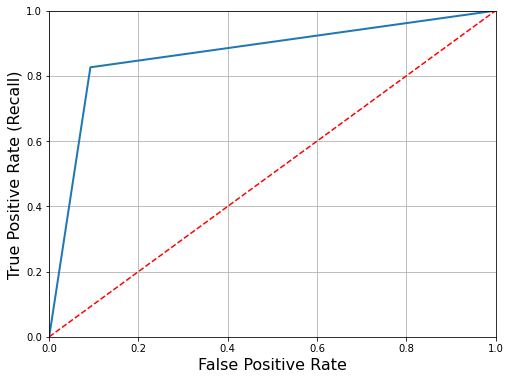

In [50]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr_forest, tpr_forest, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True) 
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_forest, tpr_forest)
plt.show()

# svm model

In [92]:
svm_clf=SVC(C = 1e5, kernel = 'linear')
svm_clf.fit(x_train,y_train)

SVC(C=100000.0, kernel='linear')

 Measuring Accuracy Using Cross-val_score

In [93]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm_clf,x_train,y_train,cv=5)

array([0.77235772, 0.82926829, 0.77235772, 0.7804878 , 0.78688525])

In [94]:
svm_score=cross_val_score(svm_clf,x_train,y_train,cv=5,scoring="accuracy")
svm_score.mean()

0.7882713581234173

 confusion matrix

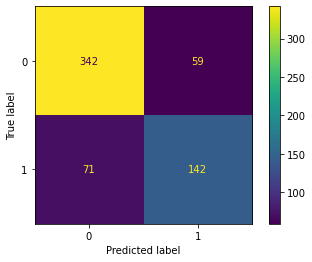

In [95]:
from sklearn.model_selection import cross_val_predict
y_train_predict=cross_val_predict(svm_clf,x_train,y_train,cv=5)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_train,y_train_predict)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [96]:
precision_score(y_train,y_train_predict)

0.7064676616915423

In [97]:
recall_score(y_train,y_train_predict)

0.6666666666666666

In [98]:
f1_score(y_train,y_train_predict)

0.6859903381642511

 Precision/Recall Tradeoff

In [99]:
y_scores = cross_val_predict(svm_clf, x_train, y_train, cv=3,method="decision_function")

In [100]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

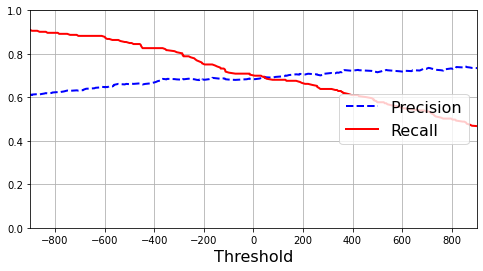

In [101]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "r-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-900, 900, 0, 1])             # Not shown
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

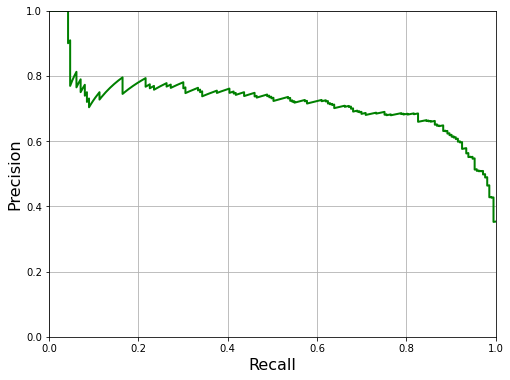

In [102]:
def plot_precision_vs_recall(precisions, recalls):
    plt.xlabel("Recall", fontsize=16)
    plt.plot(recalls, precisions, "g-", linewidth=2)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)


plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [103]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.63)]
threshold_90_precision

-750.4429714006747

In [105]:
y_train_pred_63 = (y_scores >= threshold_90_precision)

In [106]:
precision_score(y_train, y_train_pred_63)

0.6312292358803987

In [107]:
recall_score(y_train, y_train_pred_63)

0.892018779342723

 The ROC Curve

In [108]:
fpr_svm, tpr_svm, thresholds = roc_curve(y_train, y_scores)

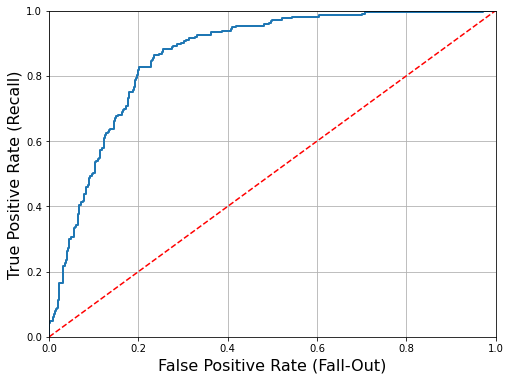

In [109]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True) 
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_svm, tpr_svm)
plt.show()

# KNN model

In [51]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

 Measuring Accuracy Using Cross-val_score

In [52]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn_clf,x_train,y_train,cv=5)

array([0.85365854, 0.88617886, 0.82113821, 0.83739837, 0.92622951])

In [53]:
knn_score=cross_val_score(knn_clf,x_train,y_train,cv=5,scoring='accuracy')
knn_score.mean()

0.8649206983873118

confusin_matrix

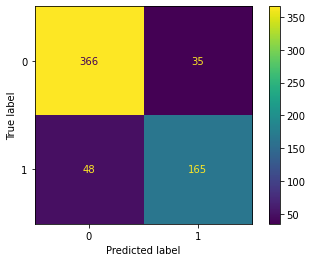

In [54]:
from sklearn.model_selection import cross_val_predict
y_train_predict=cross_val_predict(knn_clf,x_train,y_train,cv=5)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_train,y_train_predict)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [55]:
precision_score(y_train,y_train_predict)

0.825

In [56]:
recall_score(y_train,y_train_predict)

0.7746478873239436

In [57]:
f1_score(y_train,y_train_predict)

0.7990314769975787

 Precision/Recall Tradeoff

In [58]:
y_scores = cross_val_predict(knn_clf, x_train, y_train, cv=3)

In [59]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

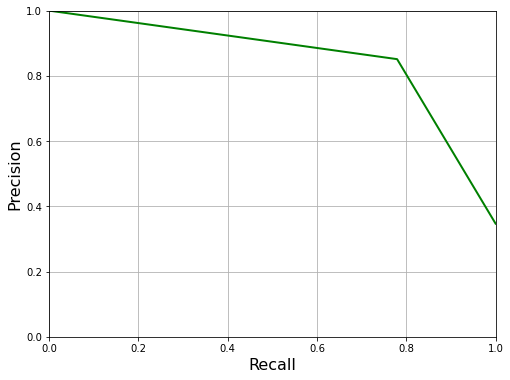

In [60]:
def plot_precision_vs_recall(precisions, recalls):
    plt.xlabel("Recall", fontsize=16)
    plt.plot(recalls, precisions, "g-", linewidth=2)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)


plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [61]:
y_pred_proba = knn_clf.predict_proba(x_train)[:,1]
fscore = (2 * precision * recall) / (precision + recall)
precision, recall, thresholds = precision_recall_curve(y_train,y_pred_proba)
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.200000, F-Score=1.000


In [62]:
y_train_pred_ = (y_scores >= 0.400000)

In [63]:
precision_score(y_train,y_train_pred_)

0.8512820512820513

In [64]:
recall_score(y_train,y_train_pred_)

0.7793427230046949

Roc curve

In [65]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

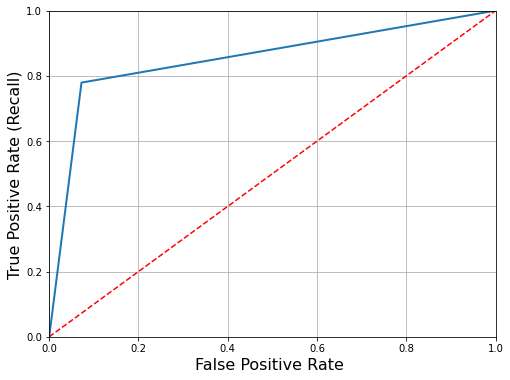

In [66]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate ', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True) 
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
plt.show()

# logistic regression model

In [67]:
log_clf= LogisticRegression(max_iter=1000,random_state=0,solver="liblinear")
log_clf.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=0, solver='liblinear')

 Measuring Accuracy Using Cross-val_score

In [68]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_clf,x_train,y_train,cv=5)

array([0.69918699, 0.78861789, 0.77235772, 0.80487805, 0.80327869])

In [69]:
log_score=cross_val_score(log_clf,x_train,y_train,cv=5,scoring='accuracy')
log_score.mean()

0.7736638677862189

confusin_matrix

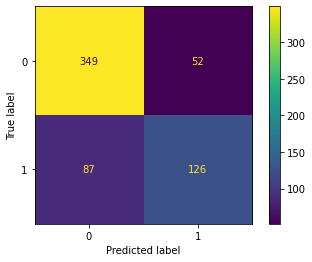

In [70]:
from sklearn.model_selection import cross_val_predict
y_train_predict=cross_val_predict(log_clf,x_train,y_train,cv=5)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_train,y_train_predict)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [71]:
accuracy_score(y_train,y_train_predict)

0.7736156351791531

In [72]:
precision_score(y_train,y_train_predict)

0.7078651685393258

In [73]:
recall_score(y_train,y_train_predict)

0.5915492957746479

In [74]:
f1_score(y_train,y_train_predict)

0.6445012787723786

In [75]:
log_clf.intercept_

array([-5.78109923])

In [76]:
log_clf.coef_

array([[ 0.06527899,  0.01912455, -0.03022295,  0.03677247,  0.01197054,
         0.02619887,  0.47638005,  0.02732097]])

We will also create a model with statsmodel to get more information.



In [110]:
lr_statsmodel = sm.Logit(y_train,x_train).fit()


Optimization terminated successfully.
         Current function value: 0.543993
         Iterations 6


In [111]:
lr_statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      606
Method:                           MLE   Df Model:                            7
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.1573
Time:                        15:21:38   Log-Likelihood:                -334.01
converged:                       True   LL-Null:                       -396.34
Covariance Type:            nonrobust   LLR p-value:                 8.173e-24
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.0848      0.034      2.508      0.012       0.019       0.151
Glucose                      0.0110      0.004      2.962      0.003       0.004       0.018
BloodPressure               -0.0657      0.009     -7.603      0.000      -0.083      -0.049
SkinThickness                0.0164      0.016      1.059      0.290      -0.014       0.047
Insulin                      0.0126      0.002      6.077      0.000       0.009       0.017
BMI                         -0.0108      0.018     -0.590      0.555      -0.047       0.025
DiabetesPedigreeFunction     0.2857      0.335      0.853      0.393      -0.370       0.942
Age                          0.0159      0.011      1.504      0.133      -0.005       0.037
============================================================================================
"""

Prediction

In [112]:
y_pred = log_clf.predict(x_test)


In [113]:
accuracy_score(y_test,y_pred)

0.8181818181818182

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        99
           1       0.76      0.71      0.74        55

    accuracy                           0.82       154
   macro avg       0.80      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



 Precision/Recall Tradeoff

In [115]:
y_scores = cross_val_predict(log_clf, x_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

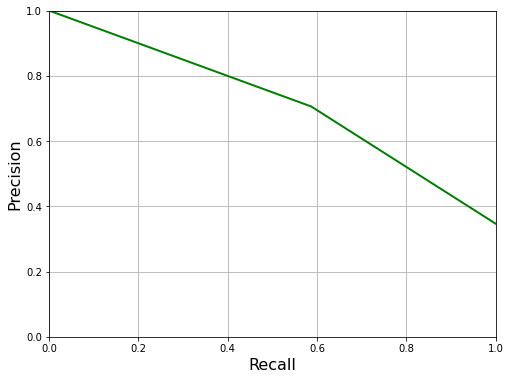

In [84]:
def precision_vs_recall(precisions, recalls):
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.plot(recalls, precisions, "g-", linewidth=2)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)


plt.figure(figsize=(8, 6))
precision_vs_recall(precisions, recalls)
plt.show()

In [85]:
y_pred_proba = log_clf.predict_proba(x_train)[:,1]
fscore = (2 * precision * recall) / (precision + recall)
precision, recall, thresholds = precision_recall_curve(y_train,y_pred_proba)
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.060224, F-Score=0.862


In [87]:
y_train_pred_ = (y_scores >= 0.060224)

In [88]:
precision_score(y_train,y_train_pred_)

0.7062146892655368

In [89]:
recall_score(y_train,y_train_pred_)

0.5868544600938967

In [90]:
fpr_log, tpr_log, thresholds = roc_curve(y_train, y_scores)

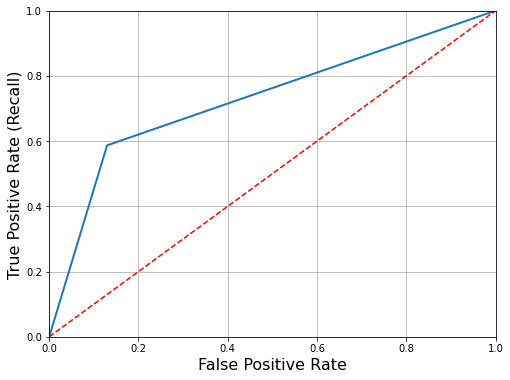

In [91]:
def plot_roc_curve(fpr_log, tpr_log, label=None):
    plt.plot(fpr_log, tpr_log, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True) 
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_log, tpr_log)
plt.show()

cpmpar

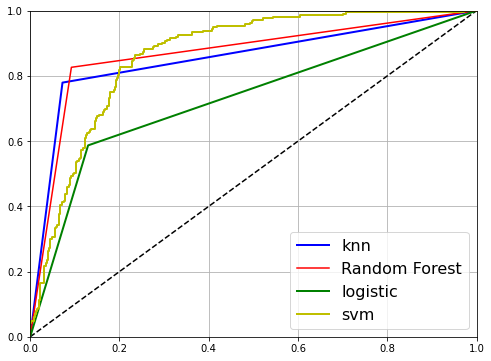

In [116]:
def plot_roc_curve(fpr, tpr,fpr_forest,tpr_forest,fpr_log,tpr_log,label=None):
    plt.figure(figsize=(8, 6))
    plt.plot([0,1],[0, 1], 'k--') # dashed diagonal
    plt.plot(fpr, tpr, "b", linewidth=2, label="knn")
    plt.plot(fpr_forest, tpr_forest,'r' ,label="Random Forest")
    plt.plot(fpr_log, tpr_log,'g',linewidth=2, label='logistic')
    plt.plot(fpr_svm, tpr_svm,'y',linewidth=2, label='svm')

    plt.axis([0, 1, 0, 1])

    plt.grid(True)
    plt.legend(loc="lower right", fontsize=16)
plot_roc_curve(fpr, tpr,fpr_forest,tpr_forest,fpr_log,tpr_log)
plt.show()